# Exercise 1:

We are analyzing the gas prices to feedback the company that has a large car fleet, whether there will be an added value by doing so or not.

The aim of exercise 1 is:

* Understand data
* Visual explanation
* Define a possible business case


Let's start!

## Stages of CRISP
![stages_of_CRISP](stages_of_CRISP.jpg)

# 1-Business Understanding

TBD

# 2-Data Understanding


### Import Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date as dt
from dateutil import parser
import calendar
import seaborn as sns
import os
import tarfile
from six.moves import urllib
import matplotlib.image as mpimg
import unittest

!pip install --upgrade folium


Requirement already up-to-date: folium in c:\users\sheri\anaconda3\lib\site-packages (0.9.1)


### 2.1:Collect Initial Data

#### Read the gas prices and stations .csv files and check some rows to get familiar with the data

Note: Data can be downloaded from: https://creativecommons.tankerkoenig.de/, there you can also find detailed description of the columns included.

In [2]:
#read the csv files and store them into variables "data_prices" & "data_stations", it was noted that the .csv file is ";" separated
data_prices = pd.read_csv('example_sprit_cut_prices.csv', sep=';')
data_stations = pd.read_csv('example_sprit_cut_station.csv', sep=';')

#print first 5 rows of the file + header
data_prices.head()
data_stations.head()

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400


### 2.2:Describe Data

Now lets explore all columns of the 2 tables, and understand what each column means.

#### Gas prices data:

It seems we have 6 columns in our gas prices data set:

* STID --> Station ID
* E5 --> E5 price (in tenths of a cent)
* E10 --> E10 price (in tenths of a cent)
* DIESEL --> Diesel price (in tenths of a cent)
* DATE_CHANGED --> Date and time of change
* CHANGED --> Bitmask for the change (to indicate which type's price has changed)

The bitmask for the price change is given in the below table:

| action | diesel | E5 | E10 |
| --- | --- | --- | --- |
| new | 3 | 12 | 48 |
| removed | 2 | 8th | 32 |
| changed | 1 | 4 | 16 |

#### Gas stations data:

It seems we have 12 columns in our gas prices data set:

* ID --> unique, steady ID of the gas station
* VERSION --> Version number, assigned by the operator (not important)
* VERSION_TIME --> Information on the last change of the version number, issued by the operator.
* NAME --> Name of gas station
* BRAND --> Brand of gas station
* STREET --> Street of gas station
* HOUSE_NUMBER --> House number of gas station
* POST_CODE --> Postal code of gas station
* PLACE --> Name of city/village
* PUBLIC_HOLIDAY_IDENTIFIER --> Abbreviation for state
* LAT --> Latitude of gas station
* LNG --> Longitude of gas station

### 2.3: Verifying Data Quality

Now lets have some statistics to know the quality of the data we have.


In [3]:
#For Prices table

data_prices.info() #get info about datatypes of columns, and if any rows have missing data
data_prices.describe() #get initial statistics on the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189526 entries, 0 to 2189525
Data columns (total 6 columns):
STID            object
E5              int64
E10             int64
DIESEL          int64
DATE_CHANGED    object
CHANGED         int64
dtypes: int64(4), object(2)
memory usage: 100.2+ MB


,E5,E10,DIESEL,CHANGED
count,2.189526e+06,2.189526e+06,2.189526e+06,2.189526e+06
mean,1.434320e+03,1.404088e+03,1.247491e+03,1.871165e+01
std,2.091502e+02,2.116844e+02,1.037774e+02,8.031150e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00
25%,1.379000e+03,1.349000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.429000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.324000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


#### Prices:
* There are no missing data
* The min. of E5, E10 and DIESEL columns is negative, which is not correct for a price value, thus all rows containing negative prices should be dropped, as we can't deduce the value in any way.
* The max. of E5, E10 is 9999 which seems illogical value, so these rows should be dropped.

In [4]:
#For Stations table

data_stations.info() #get info about datatypes of columns, and if any rows have missing data
data_stations.describe() #get initial statistics on the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 12 columns):
ID                           824 non-null object
VERSION                      824 non-null int64
VERSION_TIME                 824 non-null object
NAME                         824 non-null object
BRAND                        802 non-null object
STREET                       820 non-null object
HOUSE_NUMBER                 674 non-null object
POST_CODE                    820 non-null object
PLACE                        820 non-null object
PUBLIC_HOLIDAY_IDENTIFIER    824 non-null object
LAT                          824 non-null float64
LNG                          824 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 77.3+ KB


,VERSION,LAT,LNG
count,824.000000,824.000000,824.000000
mean,131.427184,49.322226,8.191227
std,269.682766,0.254722,0.283228
min,1.000000,48.800790,7.505350
25%,1.000000,49.106052,8.106655
50%,4.000000,49.374500,8.289707
75%,22.250000,49.509410,8.404923
max,881.000000,49.799397,8.499941


#### Stations:
* There are missing data in BRAND, STREET, HOUSE_NUMBER, POST_CODE, PLACE columns
* For the BRAND missing rows, they should be deleted
* There are some BRANDs that need to unify its name
* The missing STREET rows can be kept, since we already have their lat/long

#### Conclusion:
We need data cleaning before we start analyzing our dataset.

# 3-Data Preparation

### 3.1:Clean Data

Now lets start cleaning our data.

#### Cleaning Prices table:

* Remove duplicates:

In [5]:
data_prices.drop_duplicates(inplace=True)

* The min. value for E5, E10 and DIESEL are negative, we need to remove these rows:

In [6]:
data_prices=data_prices[data_prices['E5']>0] #drop rows having E5 price =<0
data_prices=data_prices[data_prices['E10']>0] #drop rows having E10 price =<0
data_prices=data_prices[data_prices['DIESEL']>0] #drop rows having DIESEL price =<0
data_prices.describe()

,E5,E10,DIESEL,CHANGED
count,1.075425e+06,1.075425e+06,1.075425e+06,1.075425e+06
mean,1.457085e+03,1.429118e+03,1.247725e+03,1.900296e+01
std,1.045053e+02,9.922577e+01,1.024969e+02,7.726616e+00
min,8.000000e+00,1.000000e+03,9.990000e+02,1.000000e+00
25%,1.379000e+03,1.359000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.430000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.319000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


* Remove rows having prices = NaN

In [7]:
data_prices=data_prices[np.isfinite(data_prices['E5'])]
data_prices=data_prices[np.isfinite(data_prices['E10'])]
data_prices=data_prices[np.isfinite(data_prices['DIESEL'])]
#data_prices.describe()


* The max value for E5, E10 and DIESEL are not reasonable, so we will drop all rows having values >2000

In [8]:
data_prices=data_prices[data_prices['E5'] < 2000] #drop rows having E5 values >2000
data_prices=data_prices[data_prices['E10'] < 2000] #drop rows having E10 values >2000
data_prices=data_prices[data_prices['DIESEL'] < 2000] #drop rows having DIESEL values >2000
data_prices.describe()

,E5,E10,DIESEL,CHANGED
count,1.075412e+06,1.075412e+06,1.075412e+06,1.075412e+06
mean,1.456997e+03,1.429060e+03,1.247650e+03,1.900292e+01
std,1.011090e+02,9.694896e+01,9.944750e+01,7.726382e+00
min,8.000000e+00,1.000000e+03,9.990000e+02,1.000000e+00
25%,1.379000e+03,1.359000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.429000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.319000e+03,2.100000e+01
max,1.999000e+03,1.999000e+03,1.999000e+03,6.300000e+01


The prices table now looks ready to be analyzed. Now, lets move on to clean the stations table.

#### Cleaning Stations table:

* Remove duplicates:

In [9]:
data_stations.drop_duplicates(inplace=True)

* The BRAND column contains empty values, need to be removed. Also, there are some brand names that needs to be unified:

In [10]:
data_stations['BRAND'].unique() #get unique values for BRAND
data_stations=data_stations[data_stations['BRAND'] != '\\N']; #remove rows having BRAND = '\N'
data_stations.loc[data_stations['BRAND'] == 'Supermarkt Tankstelle','BRAND']= 'Supermarkt-Tankstelle' #adjust rows having BRAND = 'Supermarkt Tankstelle' to 'Supermarkt-Tankstelle' to unify the name
data_stations.dropna(subset=['BRAND'], inplace=True) #remove empty BRAND rows
data_stations=data_stations[data_stations['BRAND'] != 'nicht mehr aktiv'] #remove stations that are no more active
data_stations['BRAND'].unique()
data_stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 709
Data columns (total 12 columns):
ID                           397 non-null object
VERSION                      397 non-null int64
VERSION_TIME                 397 non-null object
NAME                         397 non-null object
BRAND                        397 non-null object
STREET                       395 non-null object
HOUSE_NUMBER                 323 non-null object
POST_CODE                    395 non-null object
PLACE                        395 non-null object
PUBLIC_HOLIDAY_IDENTIFIER    397 non-null object
LAT                          397 non-null float64
LNG                          397 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 40.3+ KB


* Check rows having empty STREET, HOUSE_NUMBER, POST_CODE, PLACE:

In [11]:
data_stations[data_stations['PLACE'].isnull()] #get stations having empty PLACE (Only 2 stations)

#After searching using their lat/long, both stations are located in Landau, and got their postal code from the URL below:
#https://www.latlong.net/Show-Latitude-Longitude.html
data_stations.loc[data_stations['PLACE'].isnull(),'PLACE']= 'Landau'
data_stations.loc[data_stations['ID'] == 'a21e3ed2-6d03-478f-32a3-9f33202182bc','POST_CODE']= '76829'
data_stations.loc[data_stations['ID'] == 'e69a923a-ba11-409b-2720-2b908ed66498','POST_CODE']= '76863'

data_stations['PLACE'].unique()

array(['Karlsruhe', 'MANNHEIM', 'Kaiserslautern', 'KAISERSLAUTERN',
       'GERMERSHEIM', 'BAD DUERKHEIM', 'ALZEY', 'MUTTERSTADT',
       'Iffezheim', 'Grünstadt', 'Bellheim', 'Mannheim',
       'Annweiler-Queichhambach', 'WORMS', 'Herxheim',
       'Karlsruhe-Knielingen', 'LANDAU', 'Jockgrim',
       'Lampertheim-Hofheim', 'Ludwigshafen', 'Oberhausen', 'Pirmasens',
       'Klingenmünster', 'Rodalben', 'Saalstadt', 'Schifferstadt',
       'Rastatt', 'Landau', 'Waldsee', 'Edenkoben', 'Steinweiler',
       'Thaleischweiler-Fröschen', 'Bad Dürkheim', 'Freckenfeld',
       'Speyer', 'Bad Bergzabern', 'Landstuhl', 'Haßloch', 'Westhofen',
       'Lampertheim', 'Dannstadt-Schauernhe', 'Au am Rhein', 'Eppenbrunn',
       'Kuppenheim', 'Phillipsburg', 'Rheinstetten', 'Weilerbach',
       'NEUSTADT', 'Queidersbach', 'Joehlingen', 'Worms', 'Otterberg',
       'Hochspeyer', 'Carlsberg', 'Dettenheim-Liedolsheim', 'Wattenheim',
       'Alzey', 'Karlsbad', 'RUELZHEIM', 'Ettlingen OT Schöllbronn',
   

* Now the PLACE column has the cities names, but some are in capital letters, some in small letters. We need to unify the format:

In [12]:
#change PLACE text to "title format" which means first character is capital, others are small
for index, row in data_stations.iterrows():
    data_stations.loc[index,'PLACE'] = data_stations.loc[index,'PLACE'].title()

data_stations.drop_duplicates(inplace=True) #remove any duplicates that may show up after the cities naming format
data_stations['PLACE'].unique()

data_stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 709
Data columns (total 12 columns):
ID                           397 non-null object
VERSION                      397 non-null int64
VERSION_TIME                 397 non-null object
NAME                         397 non-null object
BRAND                        397 non-null object
STREET                       395 non-null object
HOUSE_NUMBER                 323 non-null object
POST_CODE                    397 non-null object
PLACE                        397 non-null object
PUBLIC_HOLIDAY_IDENTIFIER    397 non-null object
LAT                          397 non-null float64
LNG                          397 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 40.3+ KB


### 3.2: Select Data

##### Now our data is cleaned, we need to join the 2 tables using the key, which is in our case the "Station ID":

In [13]:
#Inner join both tables using "station id" as a key, output is stored in a new dataframe called "data_complete"
data_complete = pd.merge(left=data_prices,right=data_stations, how='inner',  left_on='STID', right_on='ID')

data_complete[data_complete['BRAND'].isnull()] #make sure it was inner join and not any other type.

data_complete.head()


,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,Worms,\N,49.633409,8.273847
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,Worms,\N,49.633409,8.273847
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,Worms,\N,49.633409,8.273847
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,Worms,\N,49.633409,8.273847
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,Worms,\N,49.633409,8.273847


#### We will parse the DATE_CHANGED column to year, month, day, hour, minute, seconds so that we can easily analyze over a specific month, hour...etc:

In [14]:
#Function to parse date in format yy-mm-dd hh:mm:ss, then separates it to year, month, day, hour, minute, second
def parse_date(date_string):
    year, month, split_string = date_string.split('-')
    day, time = split_string.split(' ')
    hour, minute, second = time.split(':')
    return year, month, day, hour, minute, second

#Function to take the dates column, and returns 6 lists (year, month, day, hour, minute, second)
def format_date(dates):
    year_column, month_column, day_column, hour_column, minute_column, second_column, date_column, weekday_column =[],[],[],[],[],[],[],[]
    for date_loop in dates:
        year, month, day, hour, minute, second= parse_date(date_loop)
        year_column.append(year)
        month_column.append(month)
        day_column.append(day)
        hour_column.append(hour)
        minute_column.append(minute)
        second_column.append(second)
        date_column.append(year+"-"+month+"-"+day)
        weekday_column.append(calendar.day_name[parser.parse(year+"-"+month+"-"+day).weekday()])
    return year_column,month_column,day_column,hour_column,minute_column,second_column,date_column,weekday_column

#Function to add the 6 lists to our dataframe
def add_dates(year_column,month_column,day_column,hour_column,minute_column,second_column,date_column,weekday_column):
    data_complete['year'] = year_column 
    data_complete['month'] = month_column 
    data_complete['day'] = day_column 
    data_complete['hour'] = hour_column 
    data_complete['minute'] = minute_column 
    data_complete['second'] = second_column 
    data_complete['date'] = date_column
    data_complete['weekday'] = weekday_column

dates = data_complete.values[:,4]
year_column,month_column,day_column,hour_column,minute_column,second_column,date_column,weekday_column = format_date(dates)
add_dates(year_column,month_column,day_column,hour_column,minute_column,second_column,date_column,weekday_column)


data_complete.head()


,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,ID,VERSION,VERSION_TIME,NAME,...,LAT,LNG,year,month,day,hour,minute,second,date,weekday
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,...,49.633409,8.273847,2014,10,02,05,22,01.000000,2014-10-02,Thursday
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,...,49.633409,8.273847,2014,10,02,05,26,01.000000,2014-10-02,Thursday
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,...,49.633409,8.273847,2014,10,02,09,06,01.000000,2014-10-02,Thursday
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,...,49.633409,8.273847,2014,10,03,12,14,01.000000,2014-10-03,Friday
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,...,49.633409,8.273847,2014,10,03,14,14,01.000000,2014-10-03,Friday


****Unit testing the functions****

Now we will unit test the functions to ensure their proper functionality:

In [57]:
import unittest

class TestNotebook(unittest.TestCase):

    def test_parse_date(self):
        self.assertEqual(parse_date("2014-10-02 05:22:01.000000"), ("2014","10","02","05","22","01.000000"))


unittest.main(argv=[''], verbosity=2, exit=False)

test_parse_date (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [60]:
import unittest

class TestNotebook(unittest.TestCase):

    def test_format_date(self):
        self.assertEqual(format_date(["2014-10-02 05:22:01.000000"]), (["2014"],["10"],["02"],["05"],["22"],["01.000000"],["2014-10-02"],["Thursday"]))


unittest.main(argv=[''], verbosity=2, exit=False)

test_format_date (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


##### Now our data is ready to be analyzed!

### 3.3: Data Analysis:

#### Question 1
How many different brands exist in the data set and what is the existing history in days (bar chart)?

__Ans:__ 51 brands

In [15]:
#data_complete.groupby(['BRAND', 'Complaint Type'])['Descriptor'].aggregate(len).unstack()
min_date_per_brand = data_complete.groupby(['BRAND'])['DATE_CHANGED'].min()
max_date_per_brand = data_complete.groupby(['BRAND'])['DATE_CHANGED'].max()

In [16]:
dates_per_brand = pd.DataFrame(columns=['brand', 'min_date', 'max_date','no_days'])
for brand, date in max_date_per_brand.items():
    dates_per_brand = dates_per_brand.append({'brand': brand, 'min_date':min_date_per_brand.get(brand), 'max_date':date}, ignore_index=True)

In [17]:
def difference_dates(date1,date2):
    year1, month1, day1, hour1, minute1, second1 = parse_date(date1)
    year2, month2, day2, hour2, minute2, second2 = parse_date(date2)
    d0 = dt(int(year1), int(month1), int(day1))
    d1 = dt(int(year2), int(month2), int(day2))
    delta = d1 - d0
    return delta.days

In [55]:
#Unit testing difference_dates function

import unittest

class TestNotebook(unittest.TestCase):

    def test_difference_dates(self):
        self.assertEqual(difference_dates("2014-10-02 05:22:01.000000","2014-10-12 05:22:01.000000"), 10)


unittest.main(argv=[''], verbosity=2, exit=False)

test_difference_dates (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


(51, 4)


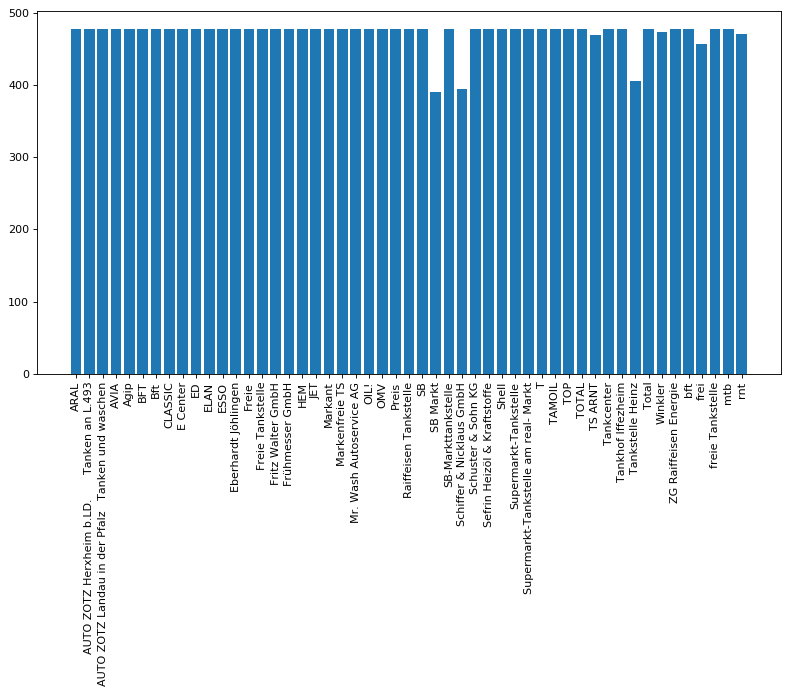

In [42]:
for i, row in dates_per_brand.iterrows():
    dates_per_brand.iloc[i][3] = difference_dates(dates_per_brand.iloc[i][1],dates_per_brand.iloc[i][2])

print(dates_per_brand.shape)
fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
#dates_per_brand.head()
plt.bar(dates_per_brand['brand'],dates_per_brand['no_days']);
plt.xticks(rotation=90);
#dates_per_brand.plot.bar(x='brand', y='no_days');

#### Question 2
What is the min, mean, max price for each gasoline type weekly (time series graph)?

In [19]:
data_complete['date_format'] = pd.to_datetime(data_complete['date']) - pd.to_timedelta(7, unit='d')
min_per_week_E5 = data_complete.groupby([pd.Grouper(key='date_format', freq='W-MON')])['E5'].min().reset_index().sort_values('date_format')
mean_per_week_E5 = data_complete.groupby([pd.Grouper(key='date_format', freq='W-MON')])['E5'].mean().reset_index().sort_values('date_format')
max_per_week_E5 = data_complete.groupby([pd.Grouper(key='date_format', freq='W-MON')])['E5'].max().reset_index().sort_values('date_format')

min_per_week_E10 = data_complete.groupby([pd.Grouper(key='date_format', freq='W-MON')])['E10'].min().reset_index().sort_values('date_format')
mean_per_week_E10 = data_complete.groupby([pd.Grouper(key='date_format', freq='W-MON')])['E10'].mean().reset_index().sort_values('date_format')
max_per_week_E10 = data_complete.groupby([pd.Grouper(key='date_format', freq='W-MON')])['E10'].max().reset_index().sort_values('date_format')

min_per_week_Diesel = data_complete.groupby([pd.Grouper(key='date_format', freq='W-MON')])['DIESEL'].min().reset_index().sort_values('date_format')
mean_per_week_Diesel = data_complete.groupby([pd.Grouper(key='date_format', freq='W-MON')])['DIESEL'].mean().reset_index().sort_values('date_format')
max_per_week_Diesel = data_complete.groupby([pd.Grouper(key='date_format', freq='W-MON')])['DIESEL'].max().reset_index().sort_values('date_format')



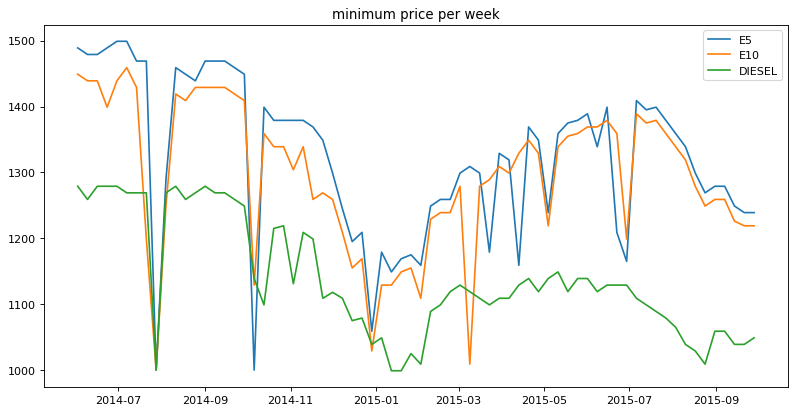

In [20]:
fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(min_per_week_E5.iloc[:,0],min_per_week_E5.iloc[:,1]);
plt.plot(min_per_week_E10.iloc[:,0],min_per_week_E10.iloc[:,1]);
plt.plot(min_per_week_Diesel.iloc[:,0],min_per_week_Diesel.iloc[:,1]);
plt.title("minimum price per week");
plt.legend();

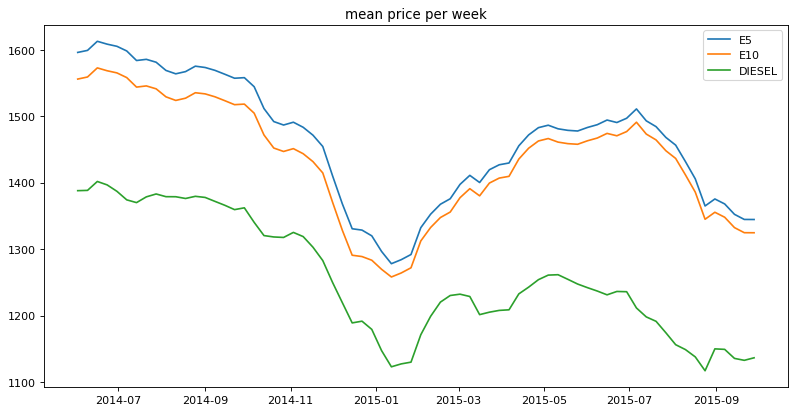

In [21]:
fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(mean_per_week_E5.iloc[:,0],mean_per_week_E5.iloc[:,1]);
plt.plot(mean_per_week_E10.iloc[:,0],mean_per_week_E10.iloc[:,1]);
plt.plot(mean_per_week_Diesel.iloc[:,0],mean_per_week_Diesel.iloc[:,1]);
plt.title("mean price per week");
plt.legend();

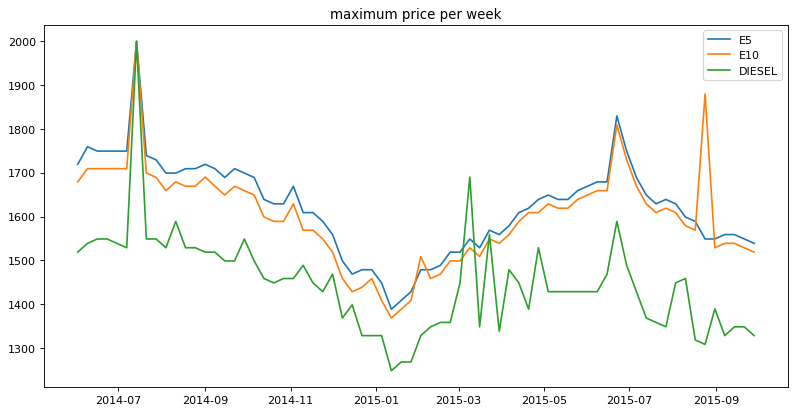

In [22]:
fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(max_per_week_E5.iloc[:,0],max_per_week_E5.iloc[:,1]);
plt.plot(max_per_week_E10.iloc[:,0],max_per_week_E10.iloc[:,1]);
plt.plot(max_per_week_Diesel.iloc[:,0],max_per_week_Diesel.iloc[:,1]);
plt.title("maximum price per week");
plt.legend();

#### Question 3
What is cheapest station (in average), why is it the cheapest?

__Ans:__ Winkler-Kaiserslautern

In [23]:
mean_E5_price_per_station = data_complete.groupby(['NAME'])['E5'].mean()
mean_E10_price_per_station = data_complete.groupby(['NAME'])['E10'].mean()
mean_Diesel_price_per_station = data_complete.groupby(['NAME'])['DIESEL'].mean()
mean_E5_price_per_station.head()

NAME
AKAY Tankstelle           1450.284133
ALZEY BAHNHOFSTR          1476.918937
ANNWEILER LANDAUER STR    1465.553556
AVIA Au am Rhein          1479.056587
AVIA Eppenbrunn           1460.596706
Name: E5, dtype: float64

In [24]:
mean_price_per_station = pd.DataFrame(columns=['Name', 'E5_mean', 'E10_mean','Diesel_mean'])
for name, price in mean_E5_price_per_station.items():
    mean_price_per_station = mean_price_per_station.append({'Name': name, 'E5_mean':price,'E10_mean':mean_E10_price_per_station.get(name), 'Diesel_mean':mean_Diesel_price_per_station.get(name)}, ignore_index=True)

mean_price_per_station[mean_price_per_station['E5_mean']==mean_price_per_station['E5_mean'].min()]
mean_price_per_station[mean_price_per_station['E10_mean']==mean_price_per_station['E10_mean'].min()]
min_station = mean_price_per_station[mean_price_per_station['Diesel_mean']==mean_price_per_station['Diesel_mean'].min()].iloc[0][0]
#print(min_station)
data_stations.loc[data_stations['NAME'] == min_station]

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
77,eef314cf-a84a-4648-9284-c2df1efa36c9,5,2014-11-26 01:00:39.000000,Winkler-Kaiserslautern,Winkler,Mainzerstraße,110,67657,Kaiserslautern,\N,49.453675,7.791683


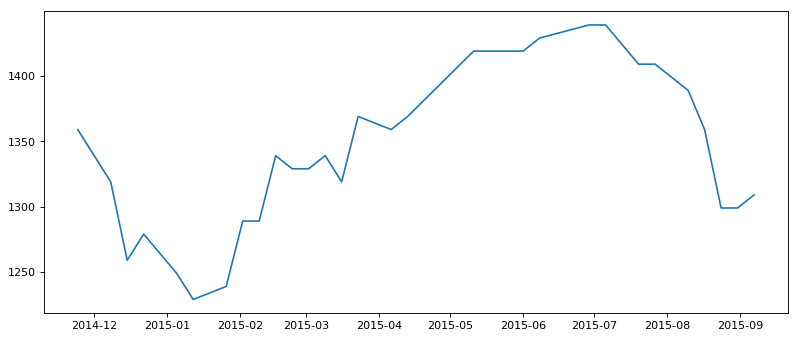

In [36]:
data_min_station = data_complete.loc[data_complete['NAME'] == min_station]
min_station_weekly_E5 = data_min_station.groupby([pd.Grouper(key='date_format', freq='W-MON')])['E5'].min().reset_index().sort_values('date_format')

min_station_weekly_E5=min_station_weekly_E5[np.isfinite(min_station_weekly_E5['E5'])]
#min_station_weekly_E5
#data_min_station.iloc[:,1]
fig=plt.figure(figsize=(12, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(min_station_weekly_E5.iloc[:,0],min_station_weekly_E5.iloc[:,1]);

#### Question 4
At which day of a weak is the price most likely the cheapest (week profile)?

__Ans:__ Saturday

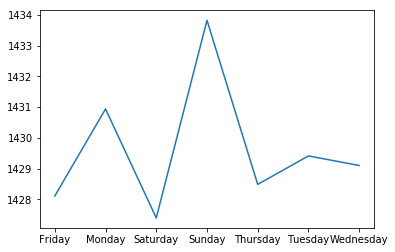

In [26]:
data_complete.head()
weekday_price_E5 = data_complete.groupby(['weekday'])['E5'].mean()
weekday_price_E10 = data_complete.groupby(['weekday'])['E10'].mean()
weekday_price_DIESEL = data_complete.groupby(['weekday'])['DIESEL'].mean()
plt.plot(weekday_price_E10);

#### Question 5
At which hour during a day is the price the cheapest (hour profile)?

__Ans:__ 18:00

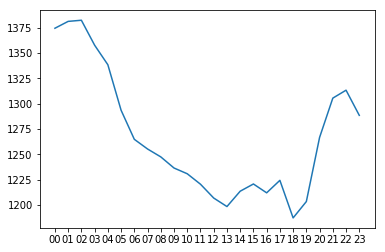

In [27]:
data_complete.head()
hour_price_E5 = data_complete.groupby(['hour'])['E5'].mean()
hour_price_E10 = data_complete.groupby(['hour'])['E10'].mean()
hour_price_DIESEL = data_complete.groupby(['hour'])['DIESEL'].mean()
plt.plot(hour_price_DIESEL);

#### Question 6
How many different locations are present in the data (visualize via a map)?

__Ans:__ 385 different locations

In [28]:
different_locations = data_complete[['LAT','LNG']]
different_locations.drop_duplicates(inplace=True)

C:\Users\sheri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
import folium
map = folium.Map(location=[49.633409, 8.273847], zoom_start=7)
for point in range(0, len(different_locations)):
    folium.Marker([different_locations.iloc[point,0],different_locations.iloc[point,1]], popup="test").add_to(map)
map

#### Question 7
What is the gas station which has most price data points, choose one and draw the time series for all 3 gas types?

__Ans:__ Aral Tankstelle

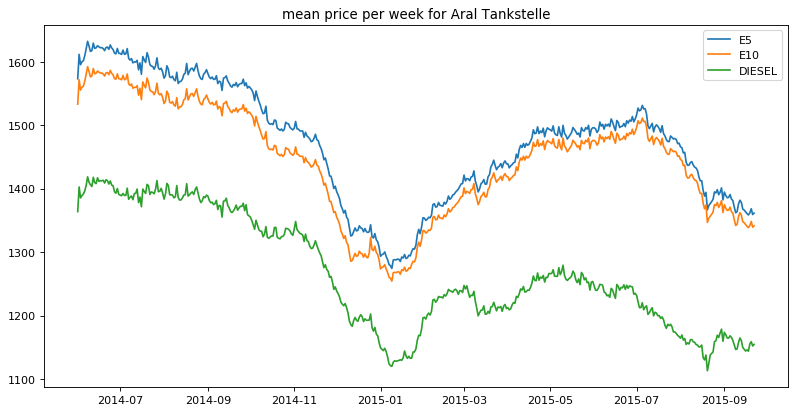

In [30]:
data_points_per_station = data_complete.groupby(['NAME'])['E5'].count()
most_data_points_station = data_points_per_station.loc[data_points_per_station == data_points_per_station.max()].keys()[0]
station_data = data_complete.loc[data_complete['NAME'] == most_data_points_station]
station_data.head()
fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(station_data.groupby(['date_format'])['E5'].mean());
plt.plot(station_data.groupby(['date_format'])['E10'].mean());
plt.plot(station_data.groupby(['date_format'])['DIESEL'].mean());
plt.title("mean price per week for "+most_data_points_station);
plt.legend();
#plt.plot(station_data['DATE_CHANGED'],station_data['E5']);   #plot takes too much time

#### Question 8
At which hour during a day do we have the most price changes?

__Ans:__ 12:00

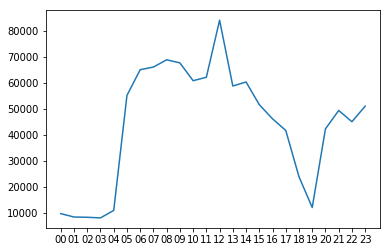

In [31]:
data_points_per_hour = data_complete.groupby(['hour'])['E5'].count()
plt.plot(data_points_per_hour);

#### Question 9
Select 20 gas stations having the longest time history and visualize the average price per month. Use heatmap and only the prices between 12:00-13:00 of e10 and diesel.

In [32]:
min_date_per_station = data_complete.groupby(['NAME'])['DATE_CHANGED'].min()
max_date_per_station = data_complete.groupby(['NAME'])['DATE_CHANGED'].max()
dates_per_station = pd.DataFrame(columns=['station', 'min_date', 'max_date','no_days'])
for station, date in max_date_per_station.items():
    dates_per_station = dates_per_station.append({'station': station, 'min_date':min_date_per_station.get(station), 'max_date':date}, ignore_index=True)

for i, row in dates_per_station.iterrows():
    dates_per_station.iloc[i][3] = difference_dates(dates_per_station.iloc[i][1],dates_per_station.iloc[i][2])


dates_per_station.sort_values(by=['no_days'],ascending=False,inplace=True)
dates_per_station.head()

longest_20_stations = dates_per_station.iloc[0:20][:]
stations_list_20 = longest_20_stations['station']
#type(stations_list_20)


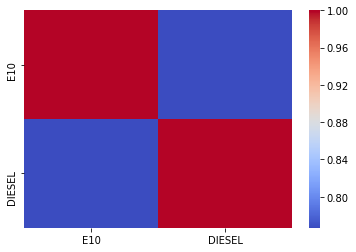

In [33]:
data_20_stations = data_complete[data_complete['NAME'].isin(stations_list_20)]
data_20_stations_time_window = data_20_stations[data_20_stations['hour'] == '12']
data_20_stations_per_month = data_20_stations_time_window.groupby(['month'])['E10','DIESEL'].mean()
data_20_stations_per_month
sns.heatmap(data_20_stations_time_window.iloc[:,2:4].corr(),cmap='coolwarm')
#data_complete.loc[data_complete['NAME'] == stations_list_20.tolist()]

#### Question 10
Describe a possible business potential in € for the customer (textual description in the ipyhton file)

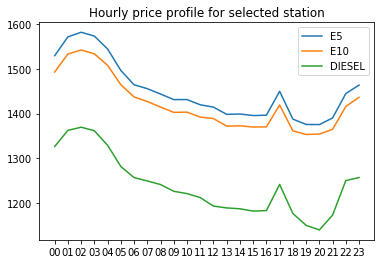

In [34]:
prices_per_brand = data_complete.groupby(['BRAND'])['E5','E10','DIESEL'].mean()
number_of_stations_per_brand = data_complete.groupby(['BRAND'])['STID'].nunique()
price_and_number_stations_per_brand = pd.merge(left=prices_per_brand,right=number_of_stations_per_brand, how='inner',  left_on='BRAND', right_on='BRAND')
price_and_number_stations_per_brand.sort_values('E5')
data_selected_station = data_complete.loc[data_complete['BRAND'] == 'JET']


hour_price_E5_selected = data_selected_station.groupby(['hour'])['E5'].mean()
hour_price_E10_selected = data_selected_station.groupby(['hour'])['E10'].mean()
hour_price_DIESEL_selected = data_selected_station.groupby(['hour'])['DIESEL'].mean()
plt.plot(hour_price_E5_selected);
plt.plot(hour_price_E10_selected);
plt.plot(hour_price_DIESEL_selected);
plt.title("Hourly price profile for selected station");
plt.legend();

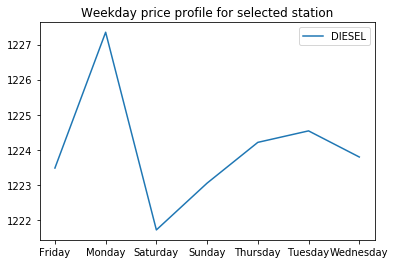

In [35]:
weekday_price_E5_selected = data_selected_station.groupby(['weekday'])['E5'].mean()
weekday_price_E10_selected = data_selected_station.groupby(['weekday'])['E10'].mean()
weekday_price_DIESEL_selected = data_selected_station.groupby(['weekday'])['DIESEL'].mean()
#plt.plot(weekday_price_E5_selected);
#plt.plot(weekday_price_E10_selected);
plt.plot(weekday_price_DIESEL_selected);
plt.title("Weekday price profile for selected station");
plt.legend();

* Based on the table above, most of the cheap brands have low number of gas stations. The cheapest brand with a reasonable number of gas stations is "JET" with 25 stations.

* For this BRAND, the hour with lowest price is 20:00

* The cheapest weekday for this BRAND is Saturday

* So, the company will get the cheapest price if the cars refueled on Saturdays at 20:00 to get the minimum price.